<a href="https://colab.research.google.com/github/Aritro30/sales_analysis_workshop_yorku/blob/main/sales_analysis_workshop_yorku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction:

You are working as a Data Analyst/Scientist in an organization. Your supervisor wants you to have a look at the commercial data for this year & to present your findings.

Importance of Data Visualization and Analysis:

1. Identifying patterns and trends in data.
2. Communicating insights clearly and concisely.
3. Managing risks and making accurate risk assessments.
4. Supporting evidence-based decision making.

Introduction to Python as a Powerful Tool:
1. Python is a powerful tool for data manipulation, analysis, and visualization.
2. It provides libraries like Pandas for efficient data manipulation.
Libraries like NumPy and SciPy offer mathematical and statistical analysis capabilities.
3. Matplotlib and Seaborn enable the creation of various visualizations.
4. Python integrates well with other technologies and can handle large datasets.

### Prerequisites:

1. Basic knowledge in Python

### Learning Outcomes:

1. Data manipulation and analysis using Pandas.
2. Data visualization using Matplotlib.

### Importing Libraries

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

### Merging 12 month of sales data into a single file

In [ ]:
#Create a list of all files in current directory
all_files = os.listdir('input_data/')
# Create an empty list to assign csv files
csv_files = []

# Create a lis of only the csv files in current directory
for file in all_files:
    if file[-3:] == 'csv':
        csv_files.append(file)
    else:
        pass
csv_files

['Sales_February_2019.csv',
 'Sales_June_2019.csv',
 'Sales_August_2019.csv',
 'Sales_November_2019.csv',
 'Sales_September_2019.csv',
 'Sales_July_2019.csv',
 'Sales_October_2019.csv',
 'Sales_March_2019.csv',
 'Sales_April_2019.csv',
 'Sales_December_2019.csv',
 'Sales_May_2019.csv',
 'Sales_January_2019.csv']

In [ ]:
all_data = pd.concat((pd.read_csv("input_data/"+f) for f in csv_files))

In [ ]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


### Basic Information



In [ ]:
all_data.shape

(186850, 6)

In [ ]:
# Basic Info about DataFrame
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


### Clean data

In [ ]:
# NaN count for each column
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [ ]:
all_data = all_data.dropna(subset=['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address'])
#all_data =all_data.dropna(how="all")
all_data = all_data[all_data['Order Date'].str[0:2]!="Or"]

all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data['Price Each'] = all_data['Price Each'].astype(float)

In [ ]:
# NaN count for each column
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [ ]:
# Describe Method
all_data.describe()

,Quantity Ordered,Price Each
count,185950.000000,185950.000000
mean,1.124383,184.399735
std,0.442793,332.731330
min,1.000000,2.990000
25%,1.000000,11.950000
50%,1.000000,14.950000
75%,1.000000,150.000000
max,9.000000,1700.000000


In [ ]:
# Adding Month Column
all_data['Months'] = all_data['Order Date'].str[0:2]
all_data['Months']  = all_data['Months'].astype(int)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
0,150502,iPhone,1,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",2
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",2
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",2
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",2
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",2


In [ ]:
# Adding a Sales Column
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
# all_data.head()

### Exploratory Data Analysis

### Trying to answer the following questions -
* What was the best month for sales? How much was earned that month?
* What city sold the most product?
* What time should we display advertisements to maximize the likelihood of customers buying products?
* What product sold the most? Why do you think it sold the most?

### What was the best month for sales?

<ipython-input-142-c35c647242a3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  q1=all_data.groupby('Months').sum()


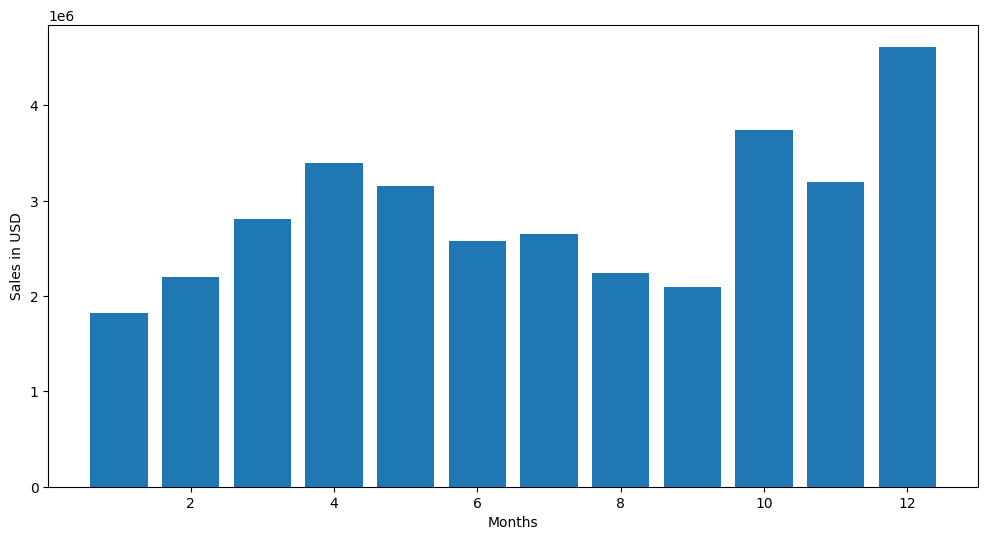

In [ ]:
q1=all_data.groupby('Months').sum()
plt.figure(figsize=(12,6))
months= range(1,13)
plt.bar(months,q1['Sales'])
plt.ylabel('Sales in USD')
plt.xlabel('Months')
plt.show()

### December was the best month of sales, followed by October. It makes sense as December is a festive season.

### What city sold the most product?

In [ ]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City
0,150502,iPhone,1,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",2,700.00,Portland (ME)
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",2,3.84,San Francisco (CA)
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",2,389.99,New York City (NY)
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",2,14.95,Atlanta (GA)
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",2,7.68,Seattle (WA)


<ipython-input-143-9430b80b855c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  q2=all_data.groupby('City').sum()


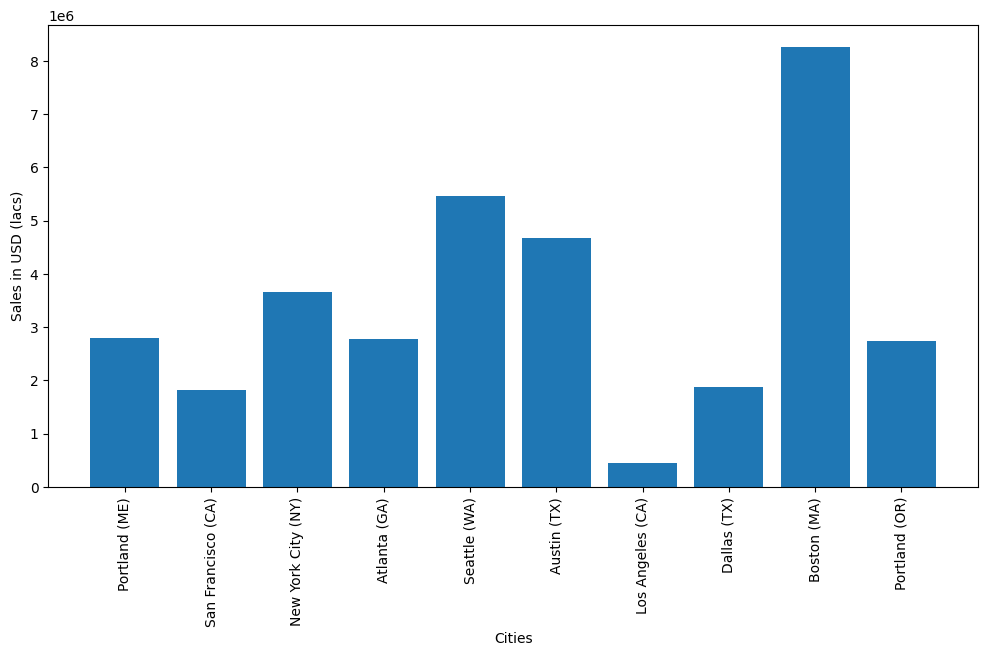

In [ ]:
q2=all_data.groupby('City').sum()
plt.figure(figsize=(12,6))
cities = all_data['City'].unique()
plt.bar(cities,q2['Sales'])
plt.xticks(rotation= 90)
plt.ylabel('Sales in USD')
plt.xlabel('Cities')
plt.show()

### Most products were sold in Boston (MA)

### What time should we display advertisements to maximize the likelihood of customer’s buying product?

In [ ]:
# Add a Columns - Hour
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()
#this step is a bit time consuming(26s)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City,Hour,Minute,Count
0,150502,iPhone,1,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",2,700.00,Portland (ME),1,35,1
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",2,3.84,San Francisco (CA),7,24,1
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",2,389.99,New York City (NY),9,46,1
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",2,14.95,Atlanta (GA),16,47,1
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",2,7.68,Seattle (WA),20,32,1


<class 'pandas.core.frame.DataFrame'>


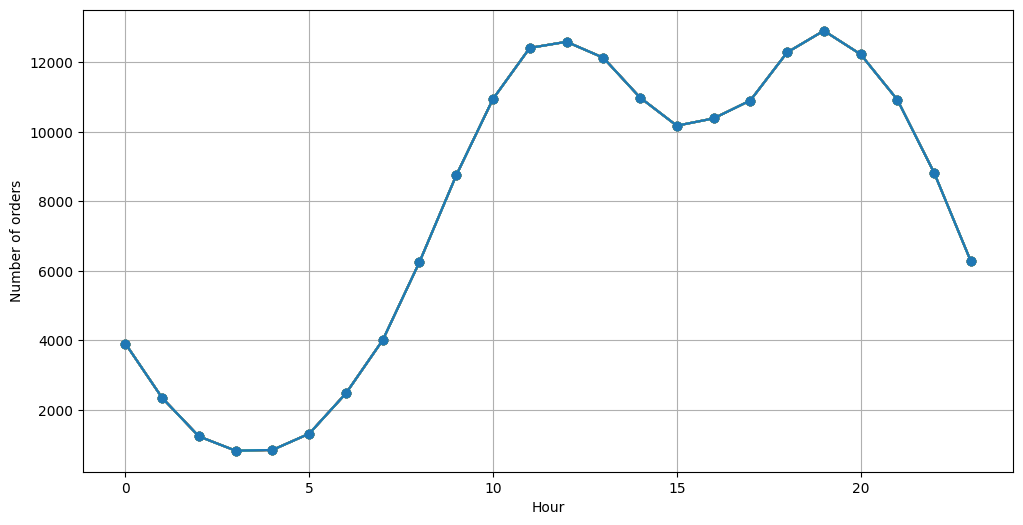

In [ ]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.figure(figsize=(12,6))
plt.plot(hours,all_data.groupby('Hour').count(),marker='o')
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.grid()
plt.show()

### The number of orders peaked from 11am-12noon and 18-19pm hence,the ideal time would be to place ads before 11am and 6pm

### What product sold the most? Why do you think it sold the most?

<ipython-input-140-7edab8fb43dd>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


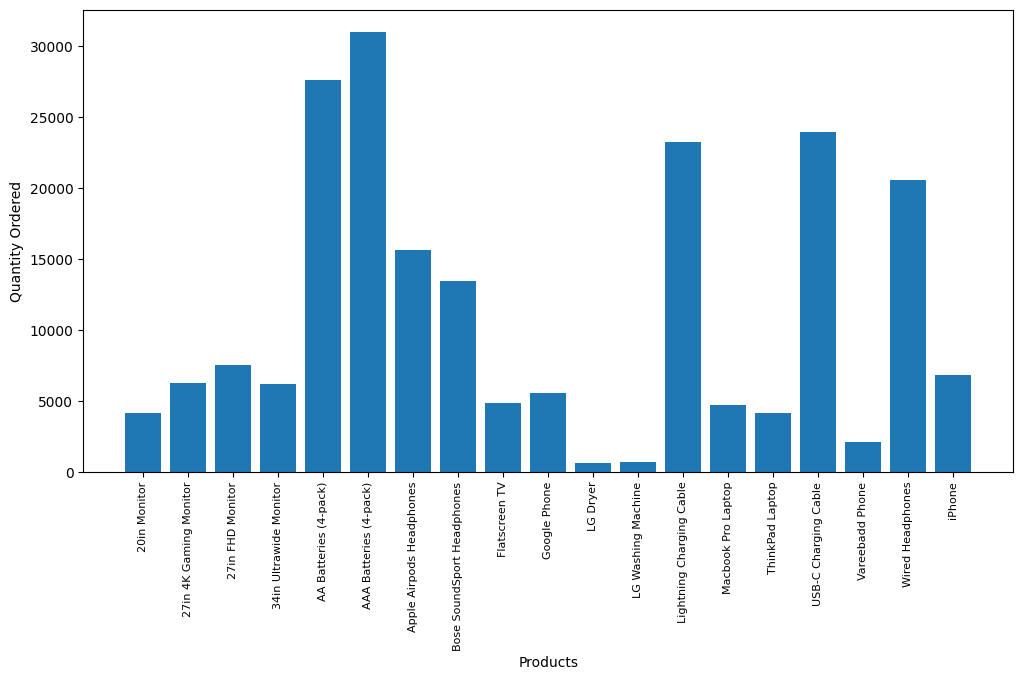

In [ ]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
# product_group.sum()
products = [product for product, df in product_group]
plt.figure(figsize=(12,6))
plt.bar(products,quantity_ordered)
plt.xticks(products, rotation='vertical',size='8')
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.show()

### The batteries and charging cables were the most sold, maybe because they were not expensive.
### whereas dryer, phones, laptops and washing machine are expensive thus sold less.

### Conclusion and Next Steps

Conclusion:

In this workshop, we learned how data visualization and analysis are essential in finding trends and patterns and how it can be used by organizations. Python, with its powerful libraries, enables efficient data manipulation, analysis, and visualization for informed decision making.

Next Steps:

Practice and Explore: Work with your own datasets or explore public datasets using Python's data manipulation and visualization libraries to gain more hands-on experience.

Expand Your Toolkit: Explore additional Python libraries like NumPy, SciPy, and scikit-learn to enhance your data analysis capabilities.

Online Resources and Courses: Take advantage of online tutorials and courses on Python and data analysis to deepen your skills. Platforms like DataCamp and Coursera offer comprehensive learning resources.

Collaborate and Share: Engage with the Python and data analysis community through forums, meetups, and open-source projects to learn from others and stay updated with the latest trends.

Continuing your learning journey and applying these skills in real-world projects will help you become proficient in leveraging Python for data analysis in financial institutions.

Thank you for attending the workshop, and best of luck in your future endeavors!